# Peak Classification: Models for classifying Solar Peaks

In this notebook, we can experiment with different models (LSTM, CNN etc.) on different data sets (fullset, wideset100, etc.)

The first group of cells represents an LSTM model that I created for the wideset100. In order for all of us to experiemnt and train separate models, I think it would be best to separate code blocks by **text** cells as I have done,
beginning with **Model Start** and ending with **Model End** with all code and metrics included between these text cells.

In this way, we can all edit the same document and look at each others models but I'm also open to other ideas for working in the document.

Also, to prevent any **version conflicts** or **compatibility issues**, I think we should import libraries separately in each of our model sections rather than compiling a huge list at the start of this notebook.

Final thought - ensure that your train, test, validation sets and model weights are fixed for repeatability, for instance by setting random seed!



In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model


### **Model Start**
Data: wide100 \
Model: LSTM

In [17]:
# Get data
wideset100 = pd.read_csv("../data/sliding_wide_100.csv")
wideset100.head()

np.random.seed(42)

# Train, test, val splits
X = wideset100.iloc[:, :-1].values
y = wideset100.iloc[:, -1].values

# Split the data into training, testing, and validation sets using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [18]:
X_train.shape[0], X_val.shape[0], X_test.shape[0]

(21204, 4544, 4544)

In [19]:
# Train example
X_train[0]

array([4.8552640e-08, 4.8575348e-08, 4.8590100e-08, 4.3660503e-08,
       5.0097253e-08, 4.8511280e-08, 4.6309523e-08, 4.7605354e-08,
       5.0638540e-08, 5.3045070e-08, 5.9455978e-08, 7.3097110e-08,
       8.1431920e-08, 7.0905585e-08, 6.3971420e-08, 5.7160623e-08,
       5.4177548e-08, 5.4571615e-08, 5.2110444e-08, 5.3595480e-08,
       5.6887437e-08, 6.0838566e-08, 6.4248020e-08, 6.1719770e-08,
       6.0132840e-08, 6.8387350e-08, 6.2766496e-08, 6.0154520e-08,
       6.2832990e-08, 6.6171670e-08, 7.8895425e-08, 6.6619680e-08,
       5.6559685e-08, 5.8655605e-08, 6.4435300e-08, 7.6989670e-08,
       9.7830320e-08, 1.3071087e-07, 3.6200746e-07, 4.1406844e-07,
       3.2519566e-07, 3.4693107e-07, 5.5512680e-07, 1.0192792e-06,
       1.6051387e-06, 2.2272977e-06, 2.8538389e-06, 3.2089993e-06,
       3.2397840e-06, 3.1457516e-06, 2.9955966e-06, 2.8246695e-06,
       2.6427930e-06, 2.4894910e-06, 2.4570184e-06, 2.4967962e-06,
       2.2407970e-06, 1.9444608e-06, 1.7713814e-06, 1.6520445e

In [20]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [21]:
# LSTM model creation (LSTM1)
def create_LSTM1():
  tf.random.set_seed(1)
  model = Sequential()
  model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.3))
  model.add(Bidirectional(LSTM(50), input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
  return model

LSTM1_model = create_LSTM1()
LSTM1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 101, 100)          20800     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 101, 100)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81301 (317.58 KB)
Trainable params: 8130

In [22]:
# Reshape input data for LSTM


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [23]:
# Shape of train data
X_train.shape

(21204, 101, 1)

In [24]:
# Train examples
X_train[0]

array([[0.28814329],
       [0.30553059],
       [0.27910214],
       [0.20282836],
       [0.24607121],
       [0.25812478],
       [0.26806698],
       [0.29515686],
       [0.30106303],
       [0.29215783],
       [0.337336  ],
       [0.45709088],
       [0.54720554],
       [0.33552897],
       [0.2220832 ],
       [0.25108263],
       [0.27854984],
       [0.32069711],
       [0.33632978],
       [0.37760247],
       [0.42777743],
       [0.47195404],
       [0.49285417],
       [0.44928532],
       [0.42076153],
       [0.48893375],
       [0.4244112 ],
       [0.3815877 ],
       [0.37732191],
       [0.3652645 ],
       [0.38578764],
       [0.26638083],
       [0.19011725],
       [0.19175979],
       [0.20683936],
       [0.23868609],
       [0.28058486],
       [0.34252638],
       [0.94418845],
       [0.97480997],
       [0.68348438],
       [0.67313783],
       [1.04103647],
       [1.82334427],
       [2.68753898],
       [3.49736908],
       [4.21307835],
       [4.334

In [25]:

LSTM1_model.fit(
    X_train, 
    y_train, 
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
)

Epoch 1/15
663/663 [==============================] - 27s 38ms/step - loss: 0.2084 - accuracy: 0.9365 - val_loss: 0.2944 - val_accuracy: 0.9032
Epoch 2/15
663/663 [==============================] - 25s 38ms/step - loss: 0.2608 - accuracy: 0.9115 - val_loss: 0.3506 - val_accuracy: 0.9014
Epoch 3/15
663/663 [==============================] - 25s 38ms/step - loss: 0.3390 - accuracy: 0.8941 - val_loss: 0.4013 - val_accuracy: 0.8497
Epoch 4/15
663/663 [==============================] - 24s 37ms/step - loss: 0.3328 - accuracy: 0.8859 - val_loss: 0.2031 - val_accuracy: 0.9408
Epoch 5/15
663/663 [==============================] - 25s 37ms/step - loss: 0.1873 - accuracy: 0.9501 - val_loss: 0.1732 - val_accuracy: 0.9540
Epoch 6/15
663/663 [==============================] - 24s 36ms/step - loss: 0.1797 - accuracy: 0.9488 - val_loss: 0.1795 - val_accuracy: 0.9498
Epoch 7/15
663/663 [==============================] - 24s 37ms/step - loss: 0.1995 - accuracy: 0.9422 - val_loss: 0.2052 - val_accuracy:

In [26]:
print(X_test.shape)
print(type(X_test))



(4544, 101, 1)
<class 'numpy.ndarray'>


In [44]:
# Evaluate the model on the test set
y_pred = LSTM1_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

142/142 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3408
           1       0.98      0.79      0.87      1136

    accuracy                           0.94      4544
   macro avg       0.96      0.89      0.92      4544
weighted avg       0.95      0.94      0.94      4544


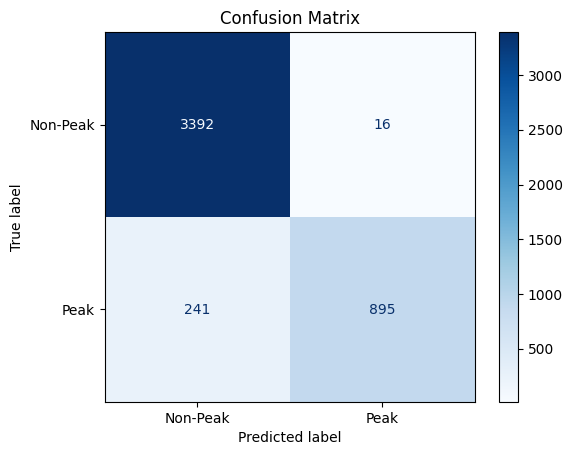

In [28]:
# Classification Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Peak', 'Peak'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [29]:
y_test.shape

(4544,)

### **Model End**

### **Model Start**
Data: foo1 \
Model: foo2

In [30]:
# Next Model

### **Model End**